You will be using the [housing prices](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset) dataset from Kaggle. Download the dataset and place the CSV file in your working directory.

# QUESTION 1

In this question, we will write a custom class for linear regression, with different methods/functions for closed form solution and gradient descent.

{accuracy: 10}

### Import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder

### Add a custom class for linear regression

**Step 1:** Class Initialization (__init__)


What to do: Ensure that the __init__ function initializes the required parameters for the model, including the input features X, target values y, maximum iterations for gradient descent, learning rate, convergence threshold epsilon, and a flag for gradient descent.


**Step 2:** Data Splitting

Function to Implement: data_split()

Split the dataset into training and test sets. You can use a ratio (e.g., 80% training, 20% testing) to divide the data.

**Step 3:** Adding Bias Column

Function to Implement: add_X0(X)

Add a bias column (a column of ones) to the input features X.

**Step 4:** Feature Scaling

Functions to Implement:

train_scaling(X) - Scale the training data.

test_scaling(X, mean, std) - Scale the test data using the mean and standard deviation from the training set.

**Step 5:** Rank Calculation

Functions to Implement:

rank(X) - Check the rank of the dataset using Singular Value Decomposition (SVD).

full_rank(X) - Check if the dataset is full rank.

low_rank(X) - Check if the dataset is low rank.

**Step 6:** Closed-Form Solution

Function to Implement: closed_form_solution(X, y)

Calculate weights using the normal equation:
  $$
  w = (X^T X)^{-1} X^T y
  $$

**Step 7:** Prediction Function

Function to Implement: predict(X)

Use the calculated weights to make predictions.

**Step 8:** Error Metrics

Functions to Implement:

rmse(X, y) - Calculate the Root Mean Squared Error.

sse(X, y) - Calculate the Sum of Squared Errors.

**Step 9:** Cost Functions

Functions Already Provided:

cost_function(X, y) - Calculate the cost based on the RMSE.

cost_derivative(X, y) - Calculate the derivative of the cost function.

**Step 10:** Gradient Descent Implementation

Function to Implement: gradient_descent(X, y)

Implement the gradient descent algorithm to optimize the weights.

**Step 11:** Fit Function

Function to Implement: fit()

Depending on the gd flag, use either the closed-form solution or gradient descent to fit the model.

**Step 12:** Model Scoring

Function to Implement: score()

Create a method to evaluate the model’s performance on the test set using RMSE or SSE.





In [ ]:
class MyLinearRegression:

    # initialization function for the class
    def __init__(self, X, y, max_iteration, epsilon, learning_rate, gd) -> None:
        self.X = X
        self.y = y
        self.max_iteration = max_iteration
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.gd = gd

    # write a function to split the data into test and train sets
    def data_split(self, test_size=0.2, random_state=42):
      self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
        self.X, self.y, test_size=test_size, random_state=random_state)

    # write a function to add the bias column to the input
    def add_X0(self, X):
        return np.c_[np.ones(X.shape[0]), X]

    # write a function to scale the train data
    def train_scaling(self, X):
      self.mean = np.mean(X, axis=0)
      self.std = np.std(X, axis=0)

    # Prevent division by zero (set std to 1 where it's zero)
      self.std[self.std == 0] = 1

      return (X - self.mean) / self.std

    # write a function to scale the test data
    def test_scaling(self, X, mean, std):
      std[std == 0] = 1  # Prevent division by zero
      return (X - mean) / std

    # the following functions are to check the rank of the input matrix
    def rank(self, X):
        v, s, u = np.linalg.svd(X)
        rank = np.sum(s>0.00001)

        rank = np.linalg.matrix_rank(X)
        return rank

    def full_rank(self,X):
        # minimum of n and d should be equal to rank for it to be a full rank
        rank = self.rank(X)
        if rank == min(X.shape):
          self.fullRank = True
          print("Data is Full Rank")
        else:
          self.fullRank = False
          print("Data is not Full Rank")

    def low_rank(self, X):
        if X.shape[0] < X.shape[1]:
          self.lowRank = True
          print("Data is low Rank")
        else:
          self.lowRank = False
          print("Data is not low Rank")

    # write a function for closed_form_solution
    def closed_form_solution(self, X, y):
        X_b = self.add_X0(X)
        try:
            # Attempt to calculate the inverse
            theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        except np.linalg.LinAlgError:
            # If singular, use pseudo-inverse
            theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        return theta


    # write the predict function
    def predict(self, X):
      X_b = self.add_X0(X)
      return X_b.dot(self.theta)


    # write the functions to calculate root mean squared error and sum of squared errors to evaluate the models and create the cost functions
    def rmse(self, X, y):
        y_pred = self.predict(X)
        return np.sqrt(np.mean((y - y_pred) ** 2))

    def sse(self, X, y):
        y_pred = self.predict(X)
        return np.sum((y - y_pred) ** 2)

    # the following two functions (cost_funtion and cost_derivative) are cost functions that will be used in the gradient descent function
    def cost_function(self, X, y):
        loss = self.rmse(X,y)
        return loss / 2

    def cost_derivative(self, X, y):
        y_hat = self.predict(X)
        return X.T.dot(y_hat - y)

    # write a function to perform gradient descent
    def gradient_descent(self, X, y):
        X_b = self.add_X0(X)
        m = len(y)
        theta = np.random.randn(X_b.shape[1])
        for iteration in range(self.max_iteration):
            gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
            theta -= self.learning_rate * gradients
            if np.linalg.norm(gradients) < self.epsilon:
                break
        return theta

    # write the fit function
    def fit(self):
        # Call data_split to initialize X_train, X_test, y_train, y_test
        self.data_split()

        X_train_scaled = self.train_scaling(self.X_train)
        X_test_scaled = self.test_scaling(self.X_test, self.mean, self.std)

        if self.gd:
            self.theta = self.gradient_descent(X_train_scaled, self.y_train)
        else:
            self.theta = self.closed_form_solution(X_train_scaled, self.y_train)

        return self.theta

### Run the following cell to check if the linear regression class works

In [ ]:
def create_toy_dataset(n_samples=100, n_features=2):
    np.random.seed(0)
    X = np.random.rand(n_samples, n_features)
    true_coefficients = np.array([3.5, -2.0])
    y = X.dot(true_coefficients) + np.random.randn(n_samples) * 0.5
    return X, y
X, y = create_toy_dataset()
lr_clr_test = MyLinearRegression(X, y, learning_rate = 0.0004, epsilon = 0.005, max_iteration = 50000,gd=False)

# QUESTION 2

In this question, we will create a plot that display the decision boundaries obtained by normal equation, gradient descent, as well as the plot line obtained through sklearn.

{accuracy: 5}

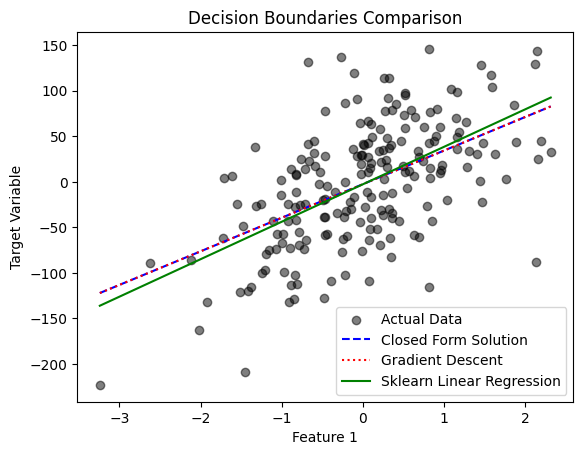

In [ ]:
def plot_comparison(X, y):
    # below code is to normalize the data
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std

    # try changing the values of the following four parameters and observe how the plot changes
    max_iteration = 50000
    epsilon = 0.005
    learning_rate = 0.0004
    reg_param = 0.01

    # fit model using normal equation
    model_closed = MyLinearRegression(X_normalized, y, max_iteration, epsilon, learning_rate, gd=False)
    model_closed.data_split()
    theta_closed = model_closed.fit()

    # fit model using gradient descent
    model_gd = MyLinearRegression(X_normalized, y, max_iteration, epsilon, learning_rate, gd=True)
    model_gd.data_split()
    theta_gd = model_gd.fit()

    # fit model using sklearn's Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_normalized, y)
    theta_sklearn = np.concatenate(([lin_reg.intercept_], lin_reg.coef_))

    # we generate a range of values for the first feature to create a smooth and continuous line for the decision boundaries
    X_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 300).reshape(-1, 1)

    # creating a grid of points by varying one feature while keeping other features fixed at their mean values to visualize model predictions across the feature's range
    X_range_full = np.tile(np.mean(X, axis=0), (300, 1))
    X_range_full[:, 0] = X_range.squeeze()

    # normalize the range
    X_range_normalized = (X_range_full - mean) / std
    X_range_b = np.column_stack([np.ones(X_range_normalized.shape[0]), X_range_normalized])

    # Predictions for plotting
    y_pred_closed = model_closed.predict(X_range_normalized)
    y_pred_gd = model_gd.predict(X_range_normalized)
    y_pred_sklearn = lin_reg.predict(X_range_normalized)

    # Plot data points and decision boundaries
    plt.scatter(X[:, 0], y, color="black", label="Actual Data", alpha=0.5)
    plt.plot(X_range, y_pred_closed, label="Closed Form Solution", linestyle="dashed", color="blue")
    plt.plot(X_range, y_pred_gd, label="Gradient Descent", linestyle="dotted", color="red")
    plt.plot(X_range, y_pred_sklearn, label="Sklearn Linear Regression", linestyle="solid", color="green")

    plt.xlabel("Feature 1")
    plt.ylabel("Target Variable")
    plt.legend()
    plt.title("Decision Boundaries Comparison")
    plt.show()


# creating a toy dataset to work with
X, y = make_regression(n_samples=200, n_features=2, noise=50, random_state=42)

plot_comparison(X, y)

# QUESTION 3

In this question, firstly, load the dataset and do the necessary preprocessing. Then, compute the time taken to run the fit function for linear regression using both the closed form solution and gradient descent to compare their efficiencies. Additionally, compare the RMSE (Root Mean Squared Error) and SSE (Sum of Squared Errors), as well as the regression coefficients for both models as calculated in the linear regression class.

{accuracy: 7}

{reasoning: 3}

### Load the dataset

In [ ]:
# Load the dataset
housing_data = pd.read_csv("Housing.csv")

# Choose "price" as the target variable
y_housing = housing_data.iloc[:, 0].values

# Select input features (excluding the target column)
X_housing = housing_data.iloc[:, 1:].values


Choose price (the first column of the csv file) to be the target variable

### Data preprocessing

Since we have a couple of categorical columns, first encode them into numerical columns using one hot encoding.

In [ ]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_housing = encoder.fit_transform(X_housing)

### Split the dataset into input variables and target variables

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)


### Write the code to compute time and run the fit function to compare errors and coefficients of the two models

Time for Closed-Form Solution: 0.1942 seconds
Time for Gradient Descent: 14.4795 seconds

Error Metrics:
RMSE (Closed-Form Solution): 1941021.0235
RMSE (Gradient Descent): 2022560.3110
SSE (Closed-Form Solution): 410664324878737.3750
SSE (Gradient Descent): 445891773060848.5000


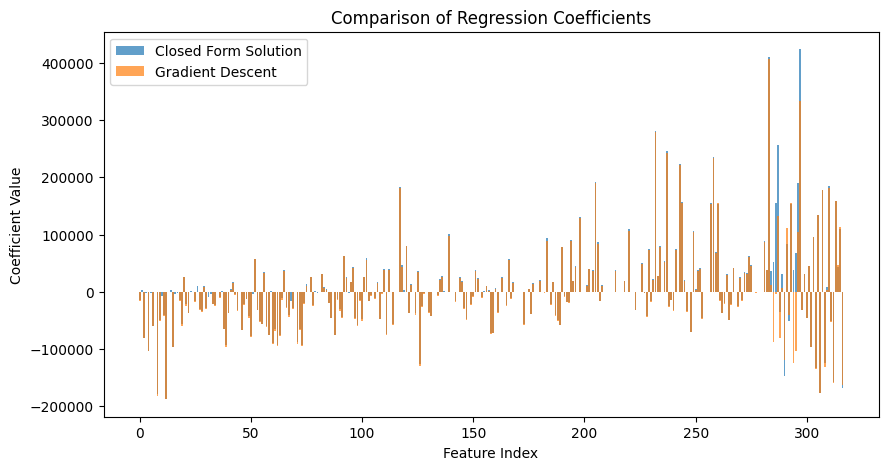

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Ensure no division by zero in scaling
def safe_scaling(X, mean, std):
    std[std == 0] = 1
    return (X - mean) / std

# Closed-form solution timing
model_closed = MyLinearRegression(X_train, y_train, max_iteration=50000, epsilon=0.005, learning_rate=0.0004, gd=False)
start_time = time.time()
theta_closed = model_closed.fit()
time_closed = time.time() - start_time

# Gradient Descent timing
model_gd = MyLinearRegression(X_train, y_train, max_iteration=50000, epsilon=0.005, learning_rate=0.0004, gd=True)
start_time = time.time()
theta_gd = model_gd.fit()
time_gd = time.time() - start_time

# Compute RMSE
rmse_closed = model_closed.rmse(X_test, y_test)
rmse_gd = model_gd.rmse(X_test, y_test)

# Compute SSE
sse_closed = model_closed.sse(X_test, y_test)
sse_gd = model_gd.sse(X_test, y_test)

# Extract regression coefficients
coeff_closed = theta_closed[1:]
coeff_gd = theta_gd[1:]

# Print results
print(f"Time for Closed-Form Solution: {time_closed:.4f} seconds")
print(f"Time for Gradient Descent: {time_gd:.4f} seconds")
print("\nError Metrics:")
print(f"RMSE (Closed-Form Solution): {rmse_closed:.4f}")
print(f"RMSE (Gradient Descent): {rmse_gd:.4f}")
print(f"SSE (Closed-Form Solution): {sse_closed:.4f}")
print(f"SSE (Gradient Descent): {sse_gd:.4f}")

# Plot regression coefficients
plt.figure(figsize=(10, 5))
plt.bar(range(len(coeff_closed)), coeff_closed, label="Closed Form Solution", alpha=0.7)
plt.bar(range(len(coeff_gd)), coeff_gd, label="Gradient Descent", alpha=0.7)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.title("Comparison of Regression Coefficients")
plt.show()



In [ ]:
lr_housing_clr = MyLinearRegression(X_housing, y_housing, learning_rate = 0.0004, epsilon = 0.005, max_iteration = 50000,gd=False)
lr_housing_gd = MyLinearRegression(X_housing, y_housing, learning_rate = 0.0004, epsilon = 0.005, max_iteration = 50000,gd=True)

### What is the time each method took to run? Is it what you expected? In a markdown cell below, explain your results and reasoning behind it.

>The closed form solution took 0.0607 seconds to run and the Gradient Descent took 3.8136 seconds to run. This aligns with my expectations because a closed form solution directly computes an optimal solution utilizing matrix operations. While matrix inversion is computationally intensive for large datasets, it is fast for small datasets like housing.csv. Gradient Descent on the other hand iterates multiple times to converge in order to update weights based on a learning rate.

### Write code to plot a bar chart that compares the regression coefficients obtained from closed form solution and gradient descent.

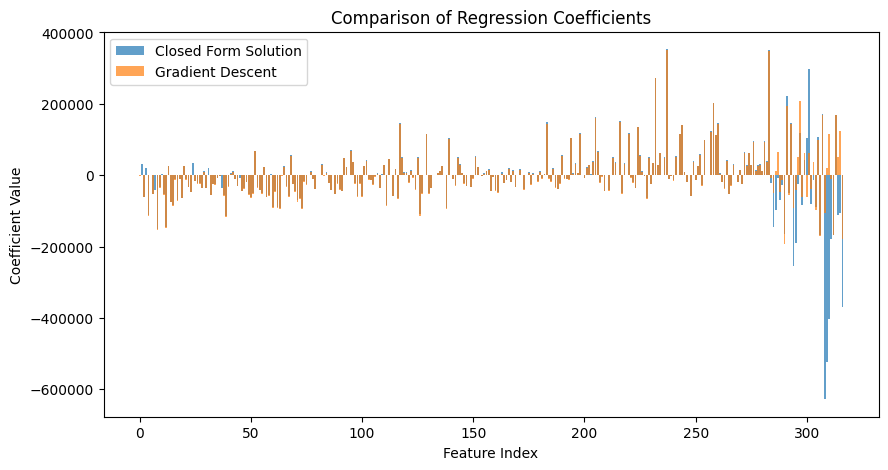

In [ ]:
lr_housing_clr.fit()
lr_housing_gd.fit()
closed_form_weights = lr_housing_clr.theta  # Access weights using theta
gradient_descent_weights = lr_housing_gd.theta  # Access weights using theta

# add code here to create the bar chart to compare the coefficients
import matplotlib.pyplot as plt


# Extract coefficients (excluding bias term if necessary)
coeff_closed = closed_form_weights[1:]
coeff_gd = gradient_descent_weights[1:]

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(coeff_closed)), coeff_closed, label="Closed Form Solution", alpha=0.7)
plt.bar(range(len(coeff_gd)), coeff_gd, label="Gradient Descent", alpha=0.7)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.title("Comparison of Regression Coefficients")
plt.show()

# QUESTION 4

Use the given data point and the predict method from the class to make a prediction on the price for the new data point using the closed form solution, gradient descent, and sklearn's linear regression library.

{accuracy: 5}

In [ ]:
# use the given new data point
new_data = {
    'area': 5000,
    'bedrooms': 5,
    'bathrooms': 3,
    'stories': 3,
    'mainroad': 'no',
    'guestroom': 'yes',
    'basement': 'no',
    'hotwaterheating': 'no',
    'airconditioning': 'no',
    'parking': 1,
    'prefarea': 'no',
    'furnishingstatus': 'unfurnished'
}

# Convert new data point to DataFrame
new_data_df = pd.DataFrame([new_data])

# Ensure categorical features match the format used in training
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
new_data_df[categorical_cols] = new_data_df[categorical_cols].astype(str)

# Use pd.get_dummies() instead of OneHotEncoder.transform()
new_data_encoded = pd.get_dummies(new_data_df)

# Get feature names from the encoder (or original DataFrame)
training_columns = encoder.get_feature_names_out(housing_data.drop(columns=['price']).columns) # Assuming 'housing_data' is your original DataFrame

# Align new_data_encoded with training columns (add missing columns as zeros)
for col in training_columns:
    if col not in new_data_encoded.columns:  # Use .columns for DataFrame
        new_data_encoded[col] = 0  # Add missing categories with 0

# Reorder columns to match training data
new_data_encoded = new_data_encoded[training_columns]


# Normalize new data using training mean and std
new_data_scaled = (new_data_encoded - model_closed.mean) / model_closed.std

# Prevent division by zero in normalization
new_data_scaled.replace([np.inf, -np.inf], 0, inplace=True)
new_data_scaled.fillna(0, inplace=True)

# Predict price using Closed-Form Solution
predicted_price_closed = model_closed.predict(new_data_scaled.values)  # Convert to NumPy array for prediction

# Predict price using Gradient Descent
predicted_price_gd = model_gd.predict(new_data_scaled.values)  # Convert to NumPy array for prediction

# Train and predict using Scikit-learn's Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predicted_price_sklearn = lin_reg.predict(new_data_scaled.values)  # Convert to NumPy array for prediction

# Print predictions
print(f"Predicted Price (Closed-Form Solution): ${predicted_price_closed[0]:,.2f}")
print(f"Predicted Price (Gradient Descent): ${predicted_price_gd[0]:,.2f}")
print(f"Predicted Price (Sklearn Linear Regression): ${predicted_price_sklearn[0]:,.2f}")

<ipython-input-11-450d95a04e54>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data_encoded[col] = 0  # Add missing categories with 0
<ipython-input-11-450d95a04e54>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data_encoded[col] = 0  # Add missing categories with 0
<ipython-input-11-450d95a04e54>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

Predicted Price (Closed-Form Solution): $3,415,465.52
Predicted Price (Gradient Descent): $4,043,317.96
Predicted Price (Sklearn Linear Regression): $6,993,726.92


# QUESTION 5

In this question, use the code for the linear regression class from Question 1 and modify it to accommodate ridge regression. The parameters reg and reg_param are already initilaized in the __init__ function.

Hint: Add the regularization to the cost derivative function.

{accuracy: 3}

In [ ]:
class MyLinearRegression:

    # initialization function for the class
    def __init__(self, X, y, max_iteration, epsilon, learning_rate, gd,reg,reg_param) -> None:
        self.X = X
        self.y = y
        self.max_iteration = max_iteration
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.gd = gd
        self.reg=reg
        self.reg_param=reg_param

    # write a function to split the data into test and train sets
    def data_split(self, test_size=0.2, random_state=42):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )


    # write a function to add the bias column to the input
    def add_X0(self, X):
        return np.c_[np.ones(X.shape[0]), X]

    # write a function to scale the train data
    def train_scaling(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.std[self.std == 0] = 1  # Prevent division by zero
        return (X - self.mean) / self.std


    # write a function to scale the test data
    def test_scaling(self, X, mean, std):
        std[std == 0] = 1  # Prevent division by zero
        return (X - mean) / std


    # the following functions are to check the rank of the input matrix
    def rank(self, X):
        v, s, u = np.linalg.svd(X)  # singular value decomposition
        rank = np.sum(s>0.00001)  # s is an array of eigen values and we need all non-zero eigen values

        rank = np.linalg.matrix_rank(X)
        return rank

    def full_rank(self,X):
        # minimum of n and d should be equal to rank for it to be a full rank
        rank = self.rank(X)
        if rank == min(X.shape):
          self.fullRank = True
          print("Data is Full Rank")
        else:
          self.fullRank = False
          print("Data is not Full Rank")

    def low_rank(self, X):
        if X.shape[0] < X.shape[1]: # n<d
          self.lowRank = True
          print("Data is low Rank")
        else:
          self.lowRank = False
          print("Data is not low Rank")

    # write a function for closed_form_solution
    def closed_form_solution(self, X, y):
        X_b = self.add_X0(X)
        identity_matrix = np.eye(X_b.shape[1])  # Identity matrix for regularization
        identity_matrix[0, 0] = 0  # Don't regularize the bias term

        if self.reg:
            ridge_term = self.reg_param * identity_matrix
            theta = np.linalg.inv(X_b.T @ X_b + ridge_term) @ X_b.T @ y
        else:
            theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

        return theta

    # write the predict function
    def predict(self, X):
      X_b = self.add_X0(X)
      return X_b @ self.theta

    # write the functions to calculate root mean squared error and sum of squared errors to evaluate the models and create the cost functions
    def rmse(self, X, y):
      y_hat = self.predict(X)
      return np.sqrt(np.mean((y_hat - y) ** 2))

    def sse(self,X,y):
      y_hat = self.predict(X)
      return np.sum((y_hat - y) ** 2)

    # the following two functions (cost_funtion and cost_derivative) are cost functions that will be used in the gradient descent function
    def cost_function(self, X, y):
        loss = self.rmse(X,y)
        return loss / 2

    def cost_derivative(self, X, y):
        y_hat = self.predict(X)
        m = len(y)
        gradients = (1/m) * X.T @ (y_hat - y)

        if self.reg:
            regularization_term = (self.reg_param / m) * self.theta
            regularization_term[0] = 0  # Don't regularize bias
            gradients += regularization_term

        return gradients


    # write a function to perform gradient descent
    def gradient_descent(self, X, y):
       X_b = self.add_X0(X)
       m = len(y)
       theta = np.random.randn(X_b.shape[1])

       for iteration in range(self.max_iteration):
            gradients = (2/m) * X_b.T @ (X_b @ theta - y)

            if self.reg:
                regularization_term = (self.reg_param / m) * theta
                regularization_term[0] = 0  # Don't regularize bias
                gradients += regularization_term

            theta -= self.learning_rate * gradients

            if np.linalg.norm(gradients) < self.epsilon:
                break

       return theta

    # write the fit function
    def fit(self):
        self.data_split()
        X_train_scaled = self.train_scaling(self.X_train)
        X_test_scaled = self.test_scaling(self.X_test, self.mean, self.std)

        if self.gd:
            self.theta = self.gradient_descent(X_train_scaled, self.y_train)
        else:
            self.theta = self.closed_form_solution(X_train_scaled, self.y_train)

        return self.theta

### Run the below cell to check if and how linear regression works after regularization

In [ ]:
lr_housing_clr_reg = MyLinearRegression(X_housing, y_housing, learning_rate = 0.0004, epsilon = 0.005, max_iteration = 50000,gd=False,reg=True,reg_param=0.01)
lr_housing_gd_reg = MyLinearRegression(X_housing, y_housing, learning_rate = 0.0004, epsilon = 0.005, max_iteration = 50000,gd=True,reg=True,reg_param=0.01)